<a href="https://colab.research.google.com/github/secret-coder-pro/major-project-expected_ctc/blob/main/epected_ctc_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('expected_ctc.csv')
df.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [38]:
df = df.drop(['IDX', 'Applicant_ID'], axis=1)
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [39]:

df[df.duplicated()]

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC


In [40]:

condition1 = ((df['Education'].isin(['Grad', 'Undergrad'])) &
              (df['Passing_Year_Of_PG'].notnull() | df['Passing_Year_Of_PHD'].notnull()))
condition2 = ((df['Education'] == 'PG') & (df['Passing_Year_Of_PHD'].notnull()))

num_inconsistencies = (df[condition1 | condition2].shape[0])
inconsistent_rows = df[condition1 | condition2]


In [41]:
num_inconsistencies

10115

In [42]:
def correct_education(row):
    if pd.notnull(row['Passing_Year_Of_PHD']):
        return 'Doctorate'
    elif pd.notnull(row['Passing_Year_Of_PG']):
        return 'PG'
    elif pd.notnull(row['Passing_Year_Of_Graduation']):
        return 'Grad'
    else:
        return 'Under Grad'

df['Education'] = df.apply(correct_education, axis=1)

In [43]:

df['Education'] = df['Education'].replace({'Doctorate':3,'PG':4, 'Grad':2, 'Under Grad':1})
df['Education'] = df['Education'].astype(int)
df['Inhand_Offer'] = df['Inhand_Offer'].replace({'Y':1, 'N':0})
df['Inhand_Offer'] = df['Inhand_Offer'].astype(int)
df['Last_Appraisal_Rating'] = df['Last_Appraisal_Rating'].fillna(0)
df['Last_Appraisal_Rating'] = df['Last_Appraisal_Rating'].replace({'Key_Performer':5,'A':4,'B':3, 'C':2, 'D':1, '':0})
df['Last_Appraisal_Rating'] = df['Last_Appraisal_Rating'].astype(int)
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,2,Arts,Lucknow,...,Guwahati,Pune,0,0,0,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,3,Chemistry,Surat,...,Bangalore,Nagpur,2702664,1,5,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,3,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,1,5,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,3,Others,Bangalore,...,Kanpur,Kolkata,2100510,0,2,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,3,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,0,2,2,3,0,0,2221390


In [44]:
cat = [col for col in df.columns if df[col].dtype == 'object']
cat

['Department',
 'Role',
 'Industry',
 'Organization',
 'Designation',
 'Graduation_Specialization',
 'University_Grad',
 'PG_Specialization',
 'University_PG',
 'PHD_Specialization',
 'University_PHD',
 'Curent_Location',
 'Preferred_location']

In [45]:
num = [col for col in df.columns if df[col].dtype != 'object']
num

['Total_Experience',
 'Total_Experience_in_field_applied',
 'Education',
 'Passing_Year_Of_Graduation',
 'Passing_Year_Of_PG',
 'Passing_Year_Of_PHD',
 'Current_CTC',
 'Inhand_Offer',
 'Last_Appraisal_Rating',
 'No_Of_Companies_worked',
 'Number_of_Publications',
 'Certifications',
 'International_degree_any',
 'Expected_CTC']

In [46]:
df[cat].isnull().sum()

,0
Department,2778
Role,963
Industry,908
Organization,908
Designation,3129
Graduation_Specialization,6180
University_Grad,6180
PG_Specialization,7692
University_PG,7692
PHD_Specialization,11881


In [47]:
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Department                 22222 non-null  object
 1   Role                       24037 non-null  object
 2   Industry                   24092 non-null  object
 3   Organization               24092 non-null  object
 4   Designation                21871 non-null  object
 5   Graduation_Specialization  18820 non-null  object
 6   University_Grad            18820 non-null  object
 7   PG_Specialization          17308 non-null  object
 8   University_PG              17308 non-null  object
 9   PHD_Specialization         13119 non-null  object
 10  University_PHD             13119 non-null  object
 11  Curent_Location            25000 non-null  object
 12  Preferred_location         25000 non-null  object
dtypes: object(13)
memory usage: 2.5+ MB


In [48]:
for col in cat:
  print(f'Unique labels in {col}: {len(df[col].unique())}')

Unique labels in Department: 13
Unique labels in Role: 25
Unique labels in Industry: 12
Unique labels in Organization: 17
Unique labels in Designation: 19
Unique labels in Graduation_Specialization: 12
Unique labels in University_Grad: 14
Unique labels in PG_Specialization: 12
Unique labels in University_PG: 14
Unique labels in PHD_Specialization: 12
Unique labels in University_PHD: 14
Unique labels in Curent_Location: 15
Unique labels in Preferred_location: 15


In [49]:
df[cat].head()

,Department,Role,Industry,Organization,Designation,Graduation_Specialization,University_Grad,PG_Specialization,University_PG,PHD_Specialization,University_PHD,Curent_Location,Preferred_location
0,NaN,NaN,NaN,NaN,NaN,Arts,Lucknow,NaN,NaN,NaN,NaN,Guwahati,Pune
1,HR,Consultant,Analytics,H,HR,Chemistry,Surat,Others,Surat,Chemistry,Mangalore,Bangalore,Nagpur
2,Top Management,Consultant,Training,J,NaN,Zoology,Jaipur,Zoology,Jaipur,Zoology,Lucknow,Ahmedabad,Jaipur
3,Banking,Financial Analyst,Aviation,F,HR,Others,Bangalore,Zoology,Bangalore,Chemistry,Guwahati,Kanpur,Kolkata
4,Sales,Project Manager,Insurance,E,Medical Officer,Zoology,Mumbai,Zoology,Mumbai,Zoology,Bangalore,Ahmedabad,Ahmedabad


<Axes: >

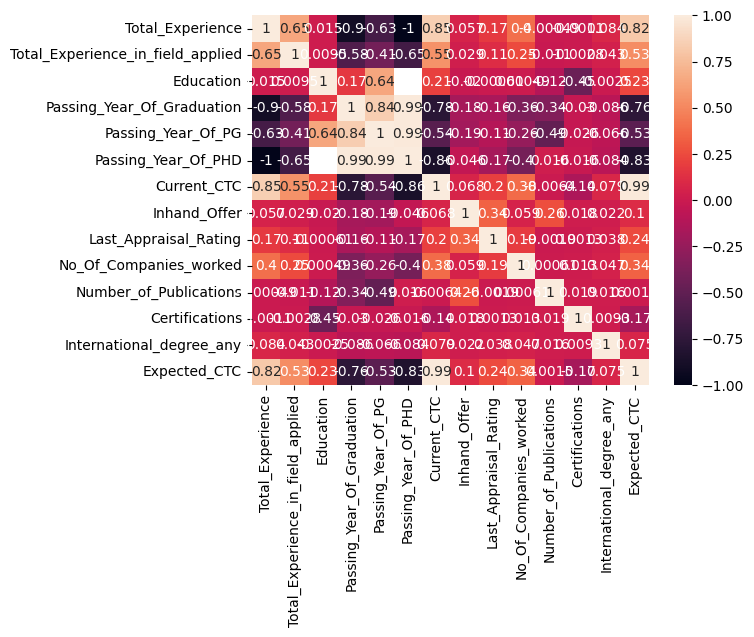

In [50]:
sns.heatmap(df[num].corr(), annot=True)

In [51]:
df.describe(include='all')

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,22222,24037,24092,24092,21871,25000.000000,18820,18820,...,25000,25000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
unique,NaN,NaN,12,24,11,16,18,NaN,11,13,...,15,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Marketing,Others,Training,M,HR,NaN,Chemistry,Bhubaneswar,...,Bangalore,Kanpur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2379,2248,2237,1574,1648,NaN,1785,1510,...,1742,1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12.493080,6.258200,NaN,NaN,NaN,NaN,NaN,2.612680,NaN,NaN,...,NaN,NaN,1.760945e+06,0.303280,2.827320,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7.471398,5.819513,NaN,NaN,NaN,NaN,NaN,1.032892,NaN,NaN,...,NaN,NaN,9.202125e+05,0.459684,1.460735,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,1.027312e+06,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12.000000,5.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,1.802568e+06,0.000000,3.000000,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,19.000000,10.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,2.443883e+06,1.000000,4.000000,5.000000,6.000000,1.000000,0.000000,3.051354e+06


In [52]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,NaN,2,Arts,Lucknow,...,Guwahati,Pune,0,0,0,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,3,Chemistry,Surat,...,Bangalore,Nagpur,2702664,1,5,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,NaN,3,Zoology,Jaipur,...,Ahmedabad,Jaipur,2236661,1,5,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,3,Others,Bangalore,...,Kanpur,Kolkata,2100510,0,2,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,3,Zoology,Mumbai,...,Ahmedabad,Ahmedabad,1931644,0,2,2,3,0,0,2221390


In [53]:

df=pd.get_dummies(df, columns=cat, drop_first=True, dtype=int)
df.head()

,Total_Experience,Total_Experience_in_field_applied,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,...,Preferred_location_Guwahati,Preferred_location_Jaipur,Preferred_location_Kanpur,Preferred_location_Kolkata,Preferred_location_Lucknow,Preferred_location_Mangalore,Preferred_location_Mumbai,Preferred_location_Nagpur,Preferred_location_Pune,Preferred_location_Surat
0,0,0,2,2020.0,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,23,14,3,1988.0,1990.0,1997.0,2702664,1,5,2,...,0,0,0,0,0,0,0,1,0,0
2,21,12,3,1990.0,1992.0,1999.0,2236661,1,5,5,...,0,1,0,0,0,0,0,0,0,0
3,15,8,3,1997.0,1999.0,2005.0,2100510,0,2,5,...,0,0,0,1,0,0,0,0,0,0
4,10,5,3,2004.0,2006.0,2010.0,1931644,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [54]:
nullcol=[var for var in df.columns if df[var].isnull().sum()!=0]
nullcol

['Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD']

In [55]:
df[nullcol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Passing_Year_Of_Graduation  18820 non-null  float64
 1   Passing_Year_Of_PG          17308 non-null  float64
 2   Passing_Year_Of_PHD         13119 non-null  float64
dtypes: float64(3)
memory usage: 586.1 KB


In [56]:
df[nullcol].isnull().sum()

,0
Passing_Year_Of_Graduation,6180
Passing_Year_Of_PG,7692
Passing_Year_Of_PHD,11881


In [57]:
# Flag rows with unexpected missing Graduation year
unexpected_grad_missing = (
    df['Education'].isin(['Grad', 'PG', 'Doctorate']) & df['Passing_Year_Of_Graduation'].isnull()
)

# Flag rows with unexpected missing PG year
unexpected_pg_missing = (
    df['Education'].isin(['PG', 'Doctorate']) & df['Passing_Year_Of_PG'].isnull()
)

# Flag rows with unexpected missing PhD year
unexpected_phd_missing = (
    (df['Education'] == 'Doctorate') & df['Passing_Year_Of_PHD'].isnull()
)

# Combine all conditions
unexpected_missing = unexpected_grad_missing | unexpected_pg_missing | unexpected_phd_missing

# Count number of unexpected missing rows
num_unexpected_missing = unexpected_missing.sum()
print("Number of unexpected missing values:", num_unexpected_missing)

# (Optional) Display rows with unexpected missing values
print(df[unexpected_missing])

Number of unexpected missing values: 0
Empty DataFrame
Columns: [Total_Experience, Total_Experience_in_field_applied, Education, Passing_Year_Of_Graduation, Passing_Year_Of_PG, Passing_Year_Of_PHD, Current_CTC, Inhand_Offer, Last_Appraisal_Rating, No_Of_Companies_worked, Number_of_Publications, Certifications, International_degree_any, Expected_CTC, Department_Analytics/BI, Department_Banking, Department_Education, Department_Engineering, Department_HR, Department_Healthcare, Department_IT-Software, Department_Marketing, Department_Others, Department_Sales, Department_Top Management, Role_Area Sales Manager, Role_Associate, Role_Bio statistician, Role_Business Analyst, Role_CEO, Role_Consultant, Role_Data scientist, Role_Financial Analyst, Role_Head, Role_Lab Executuve, Role_Others, Role_Principal Analyst, Role_Professor, Role_Project Manager, Role_Research Scientist, Role_Researcher, Role_Sales Execituve, Role_Sales Manager, Role_Scientist, Role_Senior Analyst, Role_Senior Researcher,

In [58]:
year_cols = ['Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD']
df[year_cols] = df[year_cols].fillna(0)


# Create indicator columns (1 if not completed, 0 if completed)
df['Not_Graduated'] = (df['Passing_Year_Of_Graduation'] == 0).astype(int)
df['Not_PG'] = (df['Passing_Year_Of_PG'] == 0).astype(int)
df['Not_PHD'] = (df['Passing_Year_Of_PHD'] == 0).astype(int)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 187 entries, Total_Experience to Not_PHD
dtypes: float64(3), int64(184)
memory usage: 35.7 MB


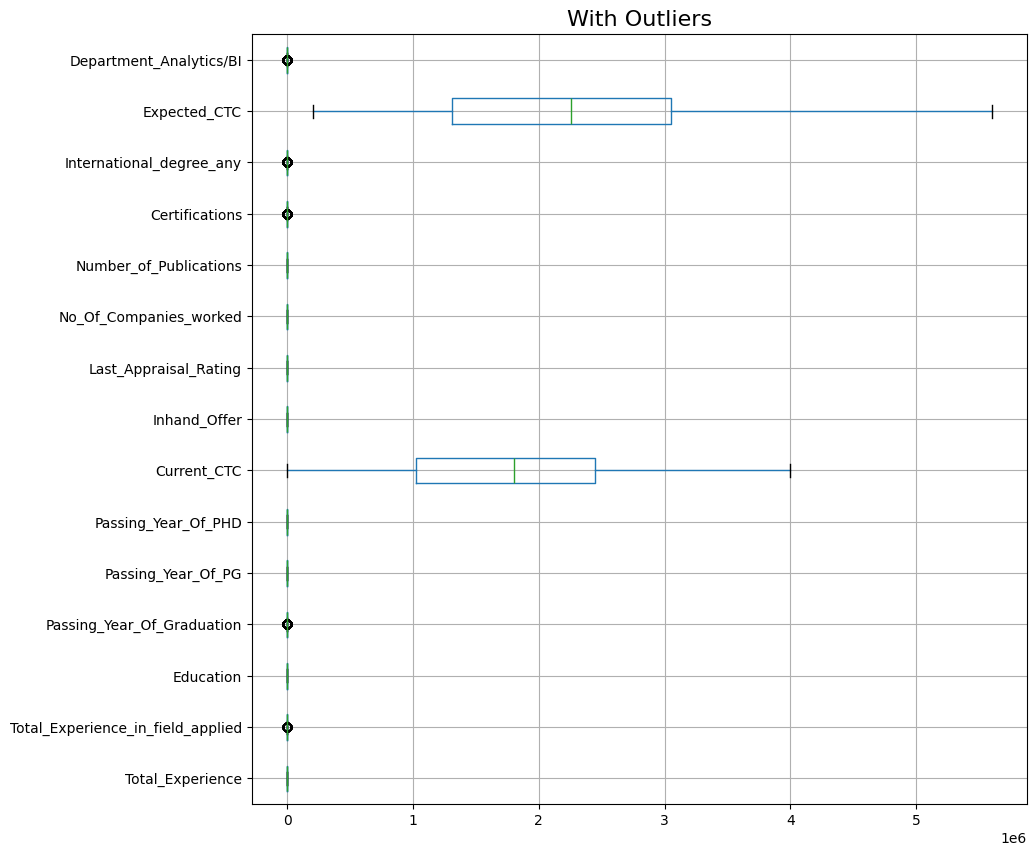

In [60]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].iloc[:, :15].boxplot(vert=False)
plt.title('With Outliers',fontsize=16)
plt.show()

In [61]:
columns_with_outliers = []

for col in df.columns:
    unique_vals = set(df[col].unique())

    # Skip binary columns
    if unique_vals <= {0, 1}:
        continue

    # Find outliers
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    outliers = df[col][(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

    # Check if meaningful outliers exist (excluding 0s and 1s)
    if len(set(outliers) - {0, 1}) > 0:
        columns_with_outliers.append(col)

print(columns_with_outliers)

['Total_Experience_in_field_applied', 'Certifications']


In [62]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Education,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,...,Preferred_location_Kolkata,Preferred_location_Lucknow,Preferred_location_Mangalore,Preferred_location_Mumbai,Preferred_location_Nagpur,Preferred_location_Pune,Preferred_location_Surat,Not_Graduated,Not_PG,Not_PHD
0,0,0,2,2020.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,23,14,3,1988.0,1990.0,1997.0,2702664,1,5,2,...,0,0,0,0,1,0,0,0,0,0
2,21,12,3,1990.0,1992.0,1999.0,2236661,1,5,5,...,0,0,0,0,0,0,0,0,0,0
3,15,8,3,1997.0,1999.0,2005.0,2100510,0,2,5,...,1,0,0,0,0,0,0,0,0,0
4,10,5,3,2004.0,2006.0,2010.0,1931644,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Expected_CTC', axis=1)
y = df['Expected_CTC']

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (20000, 186)
Test set size: (5000, 186)


In [64]:
# Cap outliers in training set using np.where
for col in columns_with_outliers:
    Q1, Q3 = np.percentile(X_train[col], [25, 75])
    IQR = Q3 - Q1
    lr = Q1 - 1.5 * IQR  # lower range
    ur = Q3 + 1.5 * IQR  # upper range

    # Cap outliers
    X_train[col] = np.where(X_train[col] > ur, ur, X_train[col])
    X_train[col] = np.where(X_train[col] < lr, lr, X_train[col])

In [65]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [67]:
model.score(X_train,y_train)

0.9864577846763813

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² score: 0.9868115464702875
RMSE: 133555.49649815337
